# Data Acquisition

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
df=pd.read_excel("C:/Users/Abhinav Tripathi/Downloads/sydney_rain prediction.xlsx")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


# Data Preprocessing

## 1. Dropping Unnecessary columns

In [6]:
df=df.drop(columns=['Location','Date'],axis=1)

## 2. Dropping unrequired rows with missing values

In [8]:
df=df.dropna(subset='Rainfall')

## 3. Imputing Missing values with forward fill method 

In [10]:
df['MinTemp']=df['MinTemp'].fillna(method='ffill')
df['MaxTemp']=df['MaxTemp'].fillna(method='ffill')
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

C:\Users\Abhinav Tripathi\AppData\Local\Temp\ipykernel_25080\1161462256.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MinTemp']=df['MinTemp'].fillna(method='ffill')
C:\Users\Abhinav Tripathi\AppData\Local\Temp\ipykernel_25080\1161462256.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MaxTemp']=df['MaxTemp'].fillna(method='ffill')


## 4. Creation of dummy variables.

In [12]:
df=pd.get_dummies(df,drop_first=True)

In [13]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,19.7,25.7,77.4,5.185396,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,False,False
3333,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,False,False
3334,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,False,False
3335,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,False,False


## 5. Univariate Analysis of the data.

In [15]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,14.865056,23.000871,3.330231,5.185396,7.173635,68.256256,54.717300,1018.349049,1016.021767,4.182803,4.218536,17.814668,21.528674
std,4.552901,4.491557,9.895172,2.755999,3.802596,15.043902,16.260795,6.997672,7.005448,2.506658,2.411407,4.891371,4.299054
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.182803,4.218536,18.100000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.500000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


## 6. Bivariate Analysis of the data

In [17]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.770948,0.012632,0.567515,-0.063390,0.053065,0.271657,-0.392678,-0.355552,0.236851,0.163812,0.938766,0.752410,0.018563,0.079153
MaxTemp,0.770948,1.000000,-0.140305,0.509148,0.325024,-0.185505,-0.151023,-0.387551,-0.423921,-0.087302,-0.099355,0.858753,0.960216,-0.188442,-0.151319
Rainfall,0.012632,-0.140305,1.000000,-0.100598,-0.306328,0.330979,0.301625,-0.037037,0.003215,0.242160,0.200756,-0.056057,-0.143690,0.555191,0.294121
Evaporation,0.567515,0.509148,-0.100598,1.000000,0.173926,-0.394105,-0.101657,-0.344964,-0.299224,-0.036787,-0.038150,0.604551,0.472786,-0.228658,-0.064860
Sunshine,-0.063390,0.325024,-0.306328,0.173926,1.000000,-0.488579,-0.582842,-0.045902,-0.093868,-0.660839,-0.676962,0.113885,0.343199,-0.366554,-0.522603
Humidity9am,0.053065,-0.185505,0.330979,-0.394105,-0.488579,1.000000,0.657478,0.262277,0.250348,0.424002,0.332448,-0.146949,-0.156033,0.400281,0.330739
Humidity3pm,0.271657,-0.151023,0.301625,-0.101657,-0.582842,0.657478,1.000000,0.153372,0.182151,0.454305,0.472250,0.129357,-0.213493,0.342714,0.472619
Pressure9am,-0.392678,-0.387551,-0.037037,-0.344964,-0.045902,0.262277,0.153372,1.000000,0.960418,-0.011641,-0.039841,-0.418549,-0.345046,-0.000356,-0.032630
Pressure3pm,-0.355552,-0.423921,0.003215,-0.299224,-0.093868,0.250348,0.182151,0.960418,1.000000,0.018193,-0.002475,-0.403879,-0.391249,0.056850,0.010966
Cloud9am,0.236851,-0.087302,0.242160,-0.036787,-0.660839,0.424002,0.454305,-0.011641,0.018193,1.000000,0.609702,0.089649,-0.088336,0.316493,0.330646


In [18]:
df = df.rename(columns={'RainToday_Yes': 'RainToday','RainTomorrow_Yes':'RainTomorrow'})

## 7. Creation of response and predictor variables.

In [20]:
x_multi=df.drop('RainTomorrow',axis=1)
y_multi=df['RainTomorrow']

# Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=42)

# DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Creating and Fitting the DecisionTreeClassifier model on the training data
clftree=DecisionTreeClassifier(max_depth=2,random_state=42)
clftree.fit(x_train,y_train)
# Prediction on the train and test data
y_train_pred_clf=clftree.predict(x_train)
y_test_pred_clf=clftree.predict(x_test)

In [183]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_test_pred_clf)

array([[488,   9],
       [109,  61]], dtype=int64)

In [26]:
accuracy_score(y_test,y_test_pred_clf)

0.823088455772114

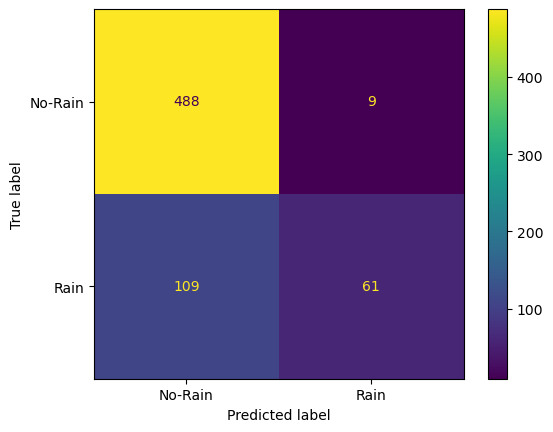

In [187]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1= confusion_matrix(y_test, y_test_pred_clf)
cmd= ConfusionMatrixDisplay(cm, display_labels=['No-Rain','Rain'])
cmd.plot()

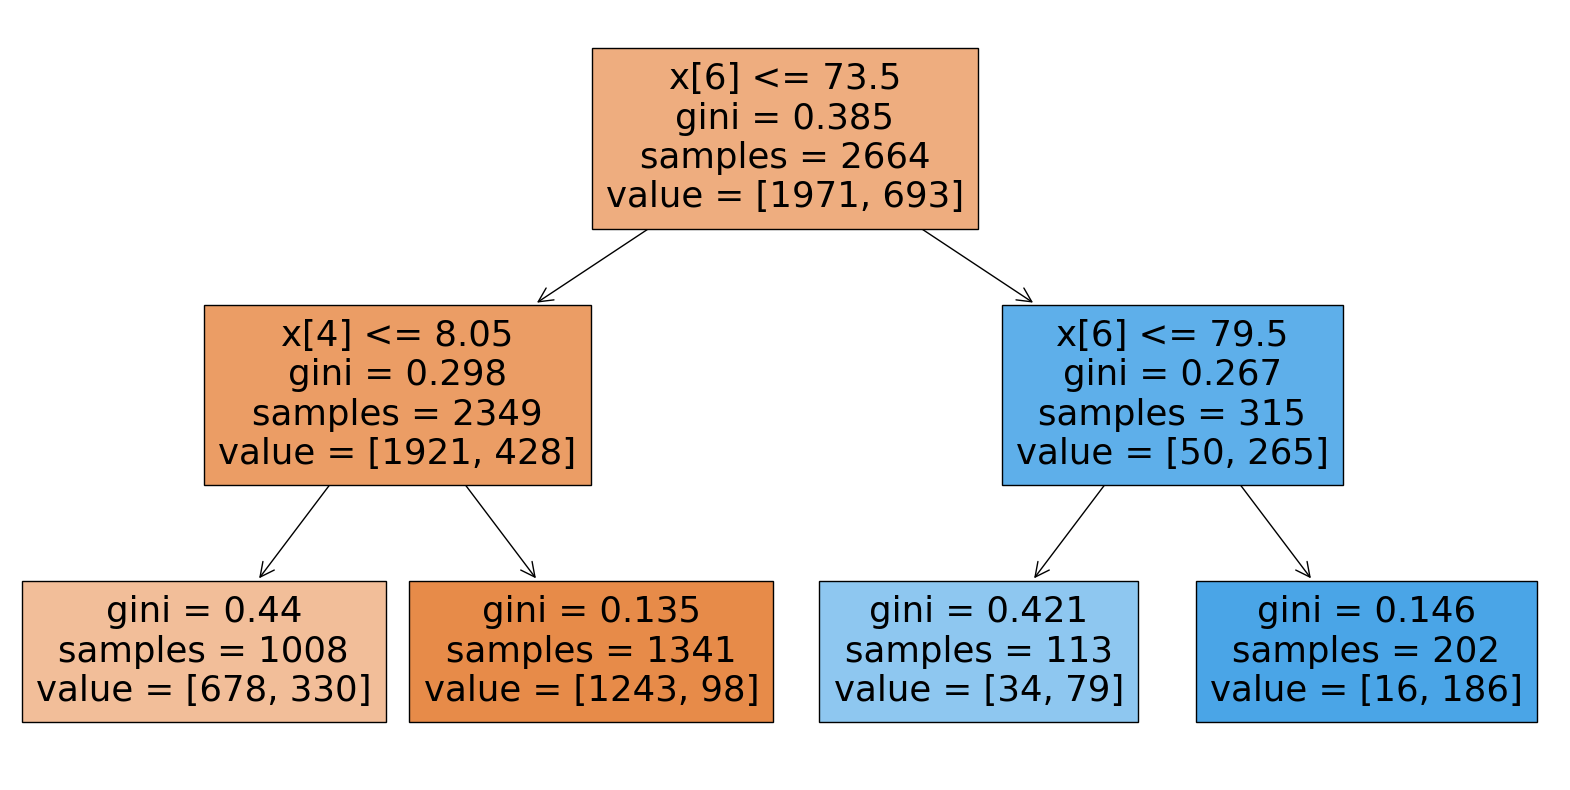

In [239]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clftree, filled=True)
plt.show()

# Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier
# Creating and Fitting the BaggingClassifer model on the training data
bagclf=BaggingClassifier(estimator=clftree,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)
bagclf.fit(x_train,y_train)
# Prediction on the train and test data
y_train_pred_bag=bagclf.predict(x_train)
y_test_pred_bag=bagclf.predict(x_test)


In [29]:
confusion_matrix(y_test,y_test_pred_bag)

array([[487,  10],
       [108,  62]], dtype=int64)

In [30]:
accuracy_score(y_test,y_test_pred_bag)

0.823088455772114

In [31]:
### Bagging with GridSearchCV
from sklearn.model_selection import GridSearchCV
params={"n_estimators":[500,700,900,1000],"max_features":[9,11,13]}
gridsearch1=GridSearchCV(bagclf,params,n_jobs=-1,cv=5,scoring='accuracy')
gridsearch1.fit(x_train,y_train)
y_train_pred_cvbag=gridsearch1.predict(x_train)
y_test_pred_cvbag=gridsearch1.predict(x_test)

In [32]:
confusion_matrix(y_test,y_test_pred_cvbag)

array([[485,  12],
       [100,  70]], dtype=int64)

In [33]:
accuracy_score(y_test,y_test_pred_cvbag)

0.8320839580209896

In [34]:
gridsearch1.best_params_

{'max_features': 9, 'n_estimators': 1000}

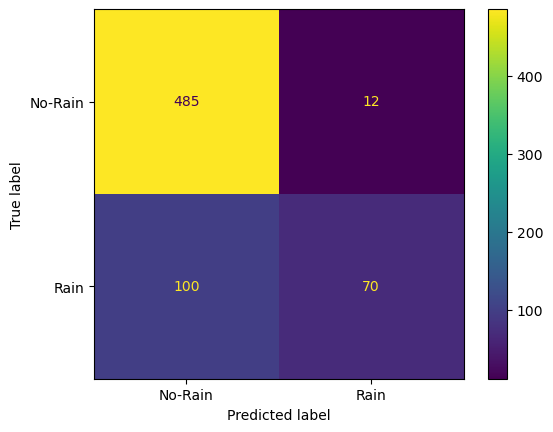

In [193]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm2= confusion_matrix(y_test, gridsearch1.best_estimator_.predict(x_test))
cmd= ConfusionMatrixDisplay(cm2, display_labels=['No-Rain','Rain'])
cmd.plot()

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Creating and Fitting the RandomForestClassifer model on the training data
rfclf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42, max_features='sqrt')
rfclf.fit(x_train,y_train)
# Prediction on the train and test data
y_train_pred_rf=rfclf.predict(x_train)
y_test_pred_rf=rfclf.predict(x_test)

In [37]:
confusion_matrix(y_test,y_test_pred_rf)

array([[468,  29],
       [ 81,  89]], dtype=int64)

In [38]:
accuracy_score(y_test,y_test_pred_rf)

0.8350824587706147

In [39]:
### Random Forest with GridSearchCV
from sklearn.model_selection import GridSearchCV
params={"max_depth":[5,6,7,8],"n_estimators":[300,400,500,900,1000]}
gridsearch2=GridSearchCV(rfclf,params,n_jobs=-1,cv=5,scoring='accuracy')
gridsearch2.fit(x_train,y_train)
y_train_pred_cvrf=gridsearch2.predict(x_train)
y_test_pred_cvrf=gridsearch2.predict(x_test)

In [40]:
confusion_matrix(y_test,y_test_pred_cvrf)

array([[479,  18],
       [ 90,  80]], dtype=int64)

In [41]:
accuracy_score(y_test,y_test_pred_cvrf)

0.8380809595202399

In [42]:
gridsearch2.best_params_

{'max_depth': 7, 'n_estimators': 500}

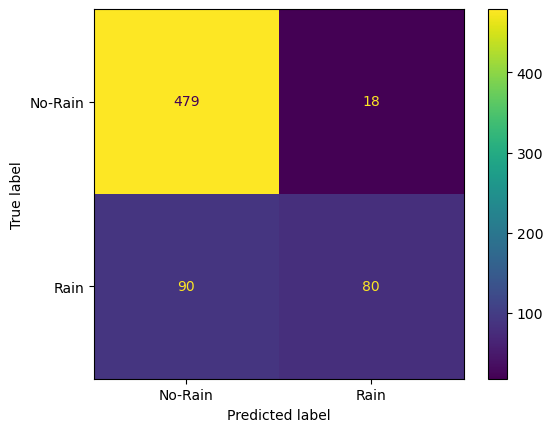

In [195]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm3= confusion_matrix(y_test, gridsearch2.best_estimator_.predict(x_test))
cmd= ConfusionMatrixDisplay(cm3, display_labels=['No-Rain','Rain'])
cmd.plot()

# Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
# Creating and Fitting the GradientBoostingClassifier model on the training data
gbclf=GradientBoostingClassifier(n_estimators=1000,max_depth=2,random_state=42)
gbclf.fit(x_train,y_train)
# Prediction on the train and test data
y_train_pred_gb=gbclf.predict(x_train)
y_test_pred_gb=gbclf.predict(x_test)

In [45]:
confusion_matrix(y_test,y_test_pred_gb)

array([[463,  34],
       [ 79,  91]], dtype=int64)

In [46]:
accuracy_score(y_test,y_test_pred_gb)

0.8305847076461769

In [47]:
### GradientBoost with GridSearchCV
from sklearn.model_selection import GridSearchCV
params={"n_estimators":[400,700,1000],"learning_rate":[0.2,0.4,0.6,0.8]}
gridsearch3=GridSearchCV(gbclf,params,n_jobs=-1,cv=5,scoring='accuracy')
gridsearch3.fit(x_train,y_train)
y_train_pred_cvgb=gridsearch3.predict(x_train)
y_test_pred_cvgb=gridsearch3.predict(x_test)

In [48]:
confusion_matrix(y_test,y_test_pred_cvgb)

array([[461,  36],
       [ 82,  88]], dtype=int64)

In [49]:
accuracy_score(y_test,y_test_pred_cvgb)

0.823088455772114

In [50]:
gridsearch3.best_params_

{'learning_rate': 0.2, 'n_estimators': 400}

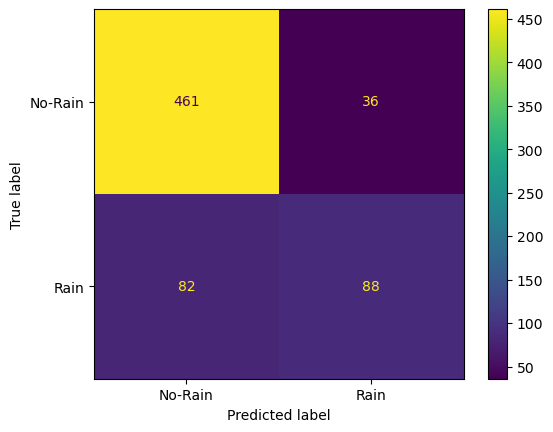

In [197]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm4= confusion_matrix(y_test, gridsearch3.best_estimator_.predict(x_test))
cmd= ConfusionMatrixDisplay(cm4, display_labels=['No-Rain','Rain'])
cmd.plot()

# ADABoost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
# Creating and Fitting the AdaBoostingClassifer model on the training data
adclf=AdaBoostClassifier(estimator=clftree,learning_rate=0.1,n_estimators=1000,random_state=42)
adclf.fit(x_train,y_train)
# Prediction on the train and test data
y_train_pred_ad=adclf.predict(x_train)
y_test_pred_ad=adclf.predict(x_test)

In [53]:
confusion_matrix(y_test,y_test_pred_ad)

array([[456,  41],
       [ 89,  81]], dtype=int64)

In [54]:
accuracy_score(y_test,y_test_pred_ad)

0.8050974512743628

In [55]:
### AdaBoost with GridSearchCV
from sklearn.model_selection import GridSearchCV
params={"n_estimators":[400,700,1000],"learning_rate":[0.2,0.4,0.6,0.8]}
gridsearch4=GridSearchCV(adclf,params,n_jobs=-1,cv=5,scoring='accuracy')
gridsearch4.fit(x_train,y_train)
y_train_pred_cvad=gridsearch4.predict(x_train)
y_test_pred_cvad=gridsearch4.predict(x_test)

In [56]:
confusion_matrix(y_test,y_test_pred_cvad)

array([[464,  33],
       [ 87,  83]], dtype=int64)

In [57]:
accuracy_score(y_test,y_test_pred_cvad)

0.8200899550224887

In [58]:
gridsearch4.best_params_

{'learning_rate': 0.2, 'n_estimators': 400}

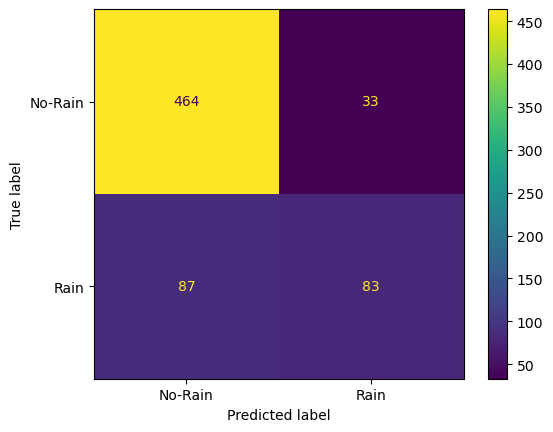

In [201]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm5= confusion_matrix(y_test, gridsearch4.best_estimator_.predict(x_test))
cmd= ConfusionMatrixDisplay(cm5, display_labels=['No-Rain','Rain'])
cmd.plot()

# XGBoost

In [60]:
from xgboost import XGBClassifier
# Creating and Fitting the XGBoosting Classifier model on the training data
xgclf = XGBClassifier(n_estimators=1000, max_depth=3, learning_rate=1,n_jobs=-1)
xgclf.fit(x_train,y_train)
# Prediction on the train and test data
y_train_pred_xg=xgclf.predict(x_train)
y_test_pred_xg=xgclf.predict(x_test)

In [61]:
confusion_matrix(y_test,y_test_pred_xg)

array([[442,  55],
       [ 73,  97]], dtype=int64)

In [62]:
accuracy_score(y_test,y_test_pred_xg)

0.808095952023988

In [63]:
### XgBoost with GridSearchCV
from sklearn.model_selection import GridSearchCV
params={"max_depth":[2,4,5,6,7,8,9],"n_estimators":[400,700,900,1000],"learning_rate":[0.2,0.4,0.6,0.8]}
gridsearch5=GridSearchCV(xgclf,params,n_jobs=-1,cv=5,scoring='accuracy')
gridsearch5.fit(x_train,y_train)
y_train_pred_cvxg=gridsearch5.predict(x_train)
y_test_pred_cvxg=gridsearch5.predict(x_test)

In [64]:
confusion_matrix(y_test,y_test_pred_cvxg)

array([[463,  34],
       [ 79,  91]], dtype=int64)

In [65]:
accuracy_score(y_test,y_test_pred_cvxg)

0.8305847076461769

In [66]:
gridsearch5.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400}

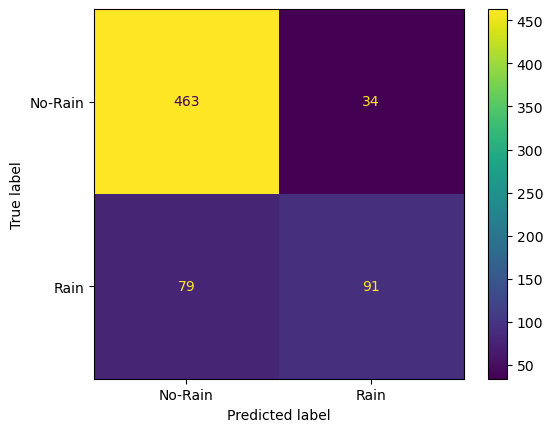

In [203]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm6= confusion_matrix(y_test, gridsearch5.best_estimator_.predict(x_test))
cmd= ConfusionMatrixDisplay(cm6, display_labels=['No-Rain','Rain'])
cmd.plot()

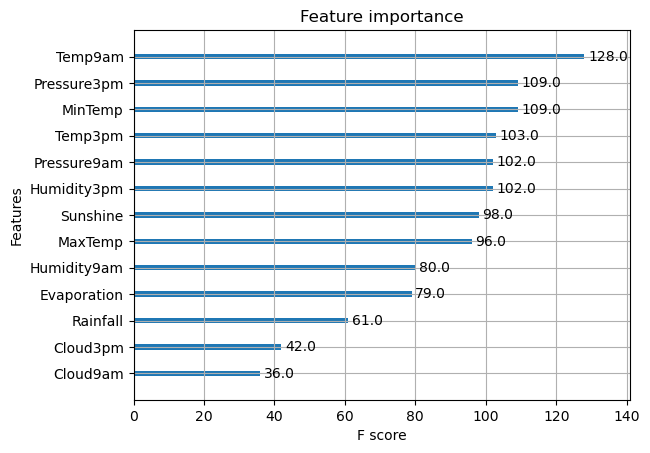

In [209]:
from xgboost import plot_importance
plot_importance(gridsearch5.best_estimator_) # top 10 most important features
plt.show()

# Best ML Model

## RANDOM FOREST CLASSIFIER

## Project Questions

#### Ques 1. Your views about the problem statement?

#### The nature of the data and the problem asked it is quite clear that it is a Classification problem. The project is asking me to analysis different attributes of weather data of a place such as his humidity , temperature and cloudiness to predict Rainfall. This can be achieved by studying the relationshihp of differnet attributes and factors and feeding them to different enhanced machine learning models which will help us in Rainfall predictions. I will use different types of classification approaches to solve this problem.

#### Ques 2. What will be your approach to solving this task?

#### I have adopted a structured way of dealing with this problem which consists of different steps:
#### 1. Data acquisition - This is the first step where we gather all the data from the source required for performing the task
#### 2. Data Preprocessing - This is the second step where we convert the raw and dirty data into a work ready and organized data. The methods used in this process include filling missing values, excluding outliers if any, and encoding categorical variables.
#### 3. Univariate Analysis of the data - Its a step taken to visualize important parameters of the data such as mean,deviation etc to have a brief idea of our data.
#### 4. Bivariate Analysis - In this step we find the correlation of all variables with each other.This is done to exclude variables that are very correlated to each other so as to avoid an error called Multicollinearity in our model.
#### 5.Train-Test-Split - In this step we split entire data into two called train set and test set. This is done so that we can also test the performance of our model and evaluate its efficiency.
#### 6. Model Creation and fitting - In this step we create diffferent ML models and fit our training data in those models.
#### 7. Model Prediction - In this step we can predictions based on the test data
#### 8. Model Evaluation - In this step we evaluate the performance of our model using different preformance metrics such as confusion matrix and accuracy scores.
#### 9. Model visualisations - In this step we visualize the predictions of our model on a chart. a chart.

#### Ques 3. What were the available ML model options you had to perform this task?

#### To perform this task we can use multiple approaches
#### 1. Decision Tree Classifier
#### 2. Bagging Classifier with GridSearchCV 
#### 3. RandomForest Classifier with GridSearchCV
#### 4. GradientBoosting Classifer with GridSearchCV
#### 5. AdaBoosting with GridSearchCV
#### 6. XGBoost with GridSearchCV

#### Ques 4. Which model’s performance is best and what could be the possible reason for that?

#### After using all the above approaches the Random Forest Classifier with GridsearchCV works best on our data with an accuracy score of 0.83808. The performance metrices clearly suggested that the RandomForestClassifer is the best model for our project. The possible reasons for this can be because Random Forest works well with a mixture of numerical and categorical features. Random Forest Algorithm eliminates overfitting as the result is based on a majority vote or average . And most importantly, Random Forest is highly resistant to noise and outliers which can be the case with our weather data

#### Ques 5. What steps can you take to improve this selected model’s performance even further?

#### To improve the performance of our model the following steps can be taken:
####  1. Data scaling and standardization so as to avoid domination of some features.
####  2. Executing cross validation over the data to better train the model 
####  3. Enhancing the quality of the data
####  4. Using predictions from different models and combining them using stacking and other techniques.

### THE END


### Other models that could be used (KNN classifier):-

In [82]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(x_train)
x_train_s=scaler.transform(x_train)
scaler=preprocessing.StandardScaler().fit(x_test)
x_test_s=scaler.transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
# Creating and Fitting the KNN classifier model on the training data
knnclf=KNeighborsClassifier(n_neighbors=19)
knnclf.fit(x_train_s,y_train)


KNeighborsClassifier(n_neighbors=19)

In [83]:
confusion_matrix(y_test,knnclf.predict(x_test_s))

array([[473,  24],
       [ 80,  90]], dtype=int64)

In [84]:
accuracy_score(y_test,knnclf.predict(x_test_s))

0.8440779610194903

#### Note:- The KNN Model that i have made above is also a good fit model for this data with the nearest neighbor value of 19. The accuracy score of the model is 0.8440 which is a really desirable value.
